2.1. Khởi tạo dataframe

2.1.1. Khởi tạo thông qua dictionary

In [151]:
import pandas as pd #thư viện chứa nhiều module
from IPython.display import display # trong module chứa các hàm -> ở đây là display
pd.set_option('display.max_colwidth', 40)
pd.set_option('display.precision', 5)  
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 30)


dict_columns = {
    'contents':['Author', 'Book', 'Target', 'No_Donation'],
    'infos':['Pham Dinh Khanh', 'ML algorithms to Practice', 'Vi mot cong dong AI vung manh hon', 'Community'],
    'numbers':[1993, 2021, 1, 2]
}
#Đây là hàm tạo DataFrame của thư viện Pandas.
#DataFrame là một cấu trúc dữ liệu 2 chiều (giống như bảng) với các cột và hàng, được sử dụng để lưu trữ và 
# thao tác dữ liệu dạng bảng (dữ liệu giống như trong bảng tính Excel).
df = pd.DataFrame(dict_columns)
display(df)

,contents,infos,numbers
0,Author,Pham Dinh Khanh,1993
1,Book,ML algorithms to Practice,2021
2,Target,Vi mot cong dong AI vung manh hon,1
3,No_Donation,Community,2


2.1.2/ Khởi tạo thông qua list các dòng:
Mỗi dòng dữ liệu sẽ được biểu diễn dưới dạng một danh sách con, và danh sách lớn sẽ chứa các dòng dữ liệu đó.Bạn có thể sử dụng tham số columns để đặt tên cho các cột.

In [152]:
# List các dòng, mỗi dòng là một danh sách con
data = [
    ['Alice', 25, 'New York'],
    ['Bob', 30, 'Los Angeles'],
    ['Charlie', 35, 'Chicago']
]

# Khởi tạo DataFrame và đặt tên cho các cột
df = pd.DataFrame(data, columns=['Name', 'Age', 'City'])

# Hiển thị DataFrame
print(df)

      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago


to_csv là hàm trong pandas dùng để lưu trữ một dataframe dưới dạng file CSV

In [153]:
df.to_csv("data.csv")

#2.1.3. Đọc dữ liệu từ file
1. sep=","
Ý nghĩa: Tham số này chỉ định dấu phân cách (delimiter) giữa các giá trị trong file CSV. Mặc định, Pandas sử dụng dấu phẩy (,), nhưng bạn có thể thay đổi thành ký tự khác như dấu chấm phẩy (;), tab (\t), hoặc bất kỳ ký tự nào khác.
2. header=0
Ý nghĩa: Tham số này chỉ định hàng nào trong file CSV sẽ được sử dụng làm tiêu đề (header) cho các cột. Giá trị 0 có nghĩa là hàng đầu tiên (hàng 0) sẽ được sử dụng làm tên cột.
3. index_col=None
Ý nghĩa: Tham số này xác định cột nào sẽ được sử dụng làm chỉ số (index) cho DataFrame. Nếu đặt None, Pandas sẽ tự động tạo chỉ số mặc định là các số nguyên bắt đầu từ 0.

In [154]:
df = pd.read_csv("https://raw.githubusercontent.com/phamdinhkhanh/datasets/master/BostonHousing.csv", sep=",", header = 0, index_col = None)
df.head(3) #số lượng dòng hiển thị từ trên xuống
df.tail() #5 dòng cuối cùng.Nếu muốn thì thêm thông số vào bên trong
df.sample() # 5 dòng ngẫu nhiên. Nếu muốn thì thêm thông số vào bên trong

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
239,0.09252,30.0,4.93,0,0.428,6.606,42.2,6.1899,6,300,16.6,383.78,7.37,23.3


Hàm df.info() sẽ cho ta biết định dạng và số lượng quan sát not-null của mỗi trường trong dataframe.

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Hàm df.dtypes để kiểm tra định dạng dữ liệu các trường của một bảng.

In [156]:
# Check for datatype
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
            ...   
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
Length: 14, dtype: object

Nếu muốn kiểm tra chi tiết hơn những thống kê mô tả của dataframe như trung bình(Mean), phương sai(Variance), min, max, độ lệch chuẩn (std),Median (50%) Giá trị trung vị - của một trường dữ liệu chúng ta dùng hàm df.describe()

In [157]:
# Thống kê mô tả dữ liệu
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000
mean,3.61352,11.36364,11.13678,0.06917,0.55470,6.28463,68.57490,3.79504,9.54941,408.23715,18.45553,356.67403,12.65306,22.53281
std,8.60155,23.32245,6.86035,0.25399,0.11588,0.70262,28.14886,2.10571,8.70726,168.53712,2.16495,91.29486,7.14106,9.19710
min,0.00632,0.00000,0.46000,0.00000,0.38500,3.56100,2.90000,1.12960,1.00000,187.00000,12.60000,0.32000,1.73000,5.00000
25%,0.08204,0.00000,5.19000,0.00000,0.44900,5.88550,45.02500,2.10018,4.00000,279.00000,17.40000,375.37750,6.95000,17.02500
50%,0.25651,0.00000,9.69000,0.00000,0.53800,6.20850,77.50000,3.20745,5.00000,330.00000,19.05000,391.44000,11.36000,21.20000
75%,3.67708,12.50000,18.10000,0.00000,0.62400,6.62350,94.07500,5.18843,24.00000,666.00000,20.20000,396.22500,16.95500,25.00000
max,88.97620,100.00000,27.74000,1.00000,0.87100,8.78000,100.00000,12.12650,24.00000,711.00000,22.00000,396.90000,37.97000,50.00000


2.1.4. Export to CSV, EXCEL, TXT, JSON
Đây là câu lệnh được sử dụng khá phổ biến để lưu trữ các file dữ liệu từ dataframe sang những định dạng khác nhau. Những định dạng này sẽ cho phép chúng ta load lại dữ liệu bằng các hàm read_csv(), read_xlsx(), read_txt(), read_json() sau đó.

In [158]:
%%script echo skipping # giúp bỏ qua phần câu lệnh phía dưới

# Lưu dữ liệu sang file csv
df.to_csv('BostonHousing.csv', index = False)
# Lưu file excel
df.to_excel('BostonHousing.xls', index = False)
# Lưu dữ file json
df.to_json('BostonHousing.json') #do not include index = False, index only use for table orient

Couldn't find program: 'echo'


#2.2. Thao tác với dataframe
2.2.1. Truy cập dataframe

Truy cập theo slice index:sử dụng hàm df.iloc[rows_slice, columns_slice] hoặc hàm df.loc[]

In [159]:
# Lựa chọn 5 dòng đầu và 5 cột đầu của df
df.iloc[:5, :5]

,crim,zn,indus,chas,nox
0,0.00632,18.0,2.31,0,0.538
1,0.02731,0.0,7.07,0,0.469
2,0.02729,0.0,7.07,0,0.469
3,0.03237,0.0,2.18,0,0.458
4,0.06905,0.0,2.18,0,0.458


In [160]:
# Lựa chọn 5 dòng từ 5:10 và 2 cột từ 2:4
# tức là sẽ bắt đầu từ dòng 5 đến 8 và cột từ 2 đến 3
df.iloc[5:10, 2:4]

,indus,chas
5,2.18,0
6,7.87,0
7,7.87,0
8,7.87,0
9,7.87,0


In [161]:
# Lựa chọn 5 dòng cuối và các cột 1 và 3
df.iloc[-5:, [1, 3]]

,zn,chas
501,0.0,0
502,0.0,0
503,0.0,0
504,0.0,0
505,0.0,0


**Nếu muốn kèm thêm bước nhảy**

In [162]:
#dòng 1, dòng 3,dòng 5 tính từ dưới lên
df.iloc[-1:-6:-2, [1, 3]]

,zn,chas
505,0.0,0
503,0.0,0
501,0.0,0


**Ngoài ra ta có thể sử dụng df.loc[] để trích xuất dữ liệu
Sự khác nhau của nó khi nào thực hành tìm hiểu trên Chat GPT
**

Truy cập theo column names: sử dụng bằng cách điền tên cột

In [163]:
df[['crim', 'tax', 'rad']].head()

,crim,tax,rad
0,0.00632,296,1
1,0.02731,242,2
2,0.02729,242,2
3,0.03237,222,3
4,0.06905,222,3


***Kết hợp cả hai cách: Chúng ta có thể truy cập dataframe bằng cách kết hợp cả hai cách theo hướng sử dụng column names đối với cột và slice index đối với dòng***

In [164]:
# Lấy ra các dòng từ 10:15 của các trường 'crim', 'tax', 'rad'
df[['crim', 'tax', 'rad']].iloc[10:15]

,crim,tax,rad
10,0.22489,311,5
11,0.11747,311,5
12,0.09378,311,5
13,0.62976,307,4
14,0.63796,307,4


#2.2.2. Lọc dataframe
Chúng ta có thể lọc dataframe thông qua các điều kiện đối với các trường. Điều kiện của trường được thể hiện như một biểu thức logic và bao trong dấu []

In [165]:
#ví dụ: Giả sử chúng ta muốn lọc ra các thị trấn mà có số phòng ở trung bình trên căn hộ
#là trên 4 thì truyền vào dấu [] điều kiện df['rm'] > 4.
df[df['rm'] > 4].head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [166]:
#Nếu chúng ta muốn kết hợp nhiều điều kiện thì dùng biểu thức logic and hoặc or.
#Ví dụ: Muốn lọc thêm điều kiện thuế suất trên 250 ngoài điều kiện số phòng thì ta làm như sau
df[(df['rm']>4) & (df['tax']>250)].head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


Muốn lọc các cột theo định dạng dữ liệu thì như thế nào?
Ta dùng hàm df.select_dtypes() để lọc các cột theo định dạng dữ liệu. Những định dạng chính bao gồm integer, float, object, boolean. 

In [167]:
#dùng hàm này để lấy dữ liệu các cột có dữ liệu là float
df.select_dtypes('float').head()

,crim,zn,indus,nox,rm,age,dis,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,18.7,396.90,5.33,36.2


Muốn lọc các cột hoặc dòng theo tên tìm kiếm.Tức là nó sẽ lọc dựa theo những cột hoặc dòng có tên giống với từ khóa

In [168]:
df2 = pd.DataFrame({
    'name':['a', 'b', 'c', 'd', 'e'],
    'age_1':[1, 2, 3, 4, 5],
    'age_2':[3, 5, 7, 9 , 10],
    'age_3':[2, 5, 2, 5, 6]
})

df2.head()
#ở ví dụ này ta có thể thấy có 4 cột. Trong đó có 3 cột có tên là age

,name,age_1,age_2,age_3
0,a,1,3,2
1,b,2,5,5
2,c,3,7,2
3,d,4,9,5
4,e,5,10,6


In [169]:
#Lựa chọn các cột bắt đầu là age thông qua hàm filter.
df2.filter(regex='^age', axis=1)
#Trong pandas thì axis=1 là làm việc với cột và axis=0 là làm việc với dòng.
#Giá trị của regex=^age có nghĩa là lọc các cột có chuỗi ký tự là age đứng đầu.

,age_1,age_2,age_3
0,1,3,2
1,2,5,5
2,3,7,2
3,4,9,5
4,5,10,6


2.2.3. Sort dữ liệu
Để sort dữ liệu chúng ta sử dụng hàm df.sort_values(.). Lựa chọn là ascending = True giúp sort theo thứ tự tăng dần, trường hợp False sẽ giảm dần.

In [170]:
#sort giá trị của 'dis'theo chiều giảm dần.
df.sort_values('dis', ascending = False).head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
353,0.01709,90.0,2.02,0,0.4100,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
352,0.07244,60.0,1.69,0,0.4110,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
351,0.07950,60.0,1.69,0,0.4110,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
355,0.10659,80.0,1.91,0,0.4130,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6
354,0.04301,80.0,1.91,0,0.4130,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
255,0.03548,80.0,3.64,0,0.3920,5.876,19.1,9.2203,1,315,16.4,395.18,9.25,20.9
254,0.04819,80.0,3.64,0,0.3920,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
56,0.02055,85.0,0.74,0,0.4100,6.383,35.7,9.1876,2,313,17.3,396.90,5.77,24.7
286,0.01965,80.0,1.76,0,0.3850,6.230,31.5,9.0892,1,241,18.2,341.60,12.93,20.1


In [171]:
#sort giá trị của 'crim'theo chiều tăng dần.
df.sort_values('crim', ascending = True).head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
284,0.00906,90.0,2.97,0,0.400,7.088,20.8,7.3073,1,285,15.3,394.72,7.85,32.2
285,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,394.72,8.23,22.0
341,0.01301,35.0,1.52,0,0.442,7.241,49.3,7.0379,1,284,15.5,394.74,5.49,32.7
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
54,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9
195,0.01381,80.0,0.46,0,0.422,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
57,0.01432,100.0,1.32,0,0.411,6.816,40.5,8.3248,5,256,15.1,392.90,3.95,31.6
194,0.01439,60.0,2.93,0,0.401,6.604,18.8,6.2196,1,265,15.6,376.70,4.38,29.1
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5


In [172]:
#Sort đồng thời nhiều đối tượng
df.sort_values(['medv', 'tax'], ascending = False).head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
368,4.89822,0.0,18.1,0,0.631,4.970,100.0,1.3325,24,666,20.2,375.52,3.26,50.0
369,5.66998,0.0,18.1,1,0.631,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.1,1,0.631,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.1,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.1,1,0.668,5.875,89.6,1.1296,24,666,20.2,347.88,8.88,50.0


#2.2.4. Các hàm đối với một trường

2.2.4.1. Min, max, mean, meadian, sum

In [173]:
# min, max, mean, median, sum
print(df['tax'].min(), df['tax'].max(), df['tax'].mean(), df['tax'].median(), df['tax'].sum())

187 711 408.2371541501976 330.0 206568


2.2.4.2. Hàm cut
Hàm cut giúp ta phân chia giá trị của một trường liên tục vào những khoảng theo ngưỡng cắt. Kết quả trả ra là nhãn của từng khoảng mà chúng ta khai báo.

In [174]:
bins = [-999999, 250, 400, 999999]
labels = ['low', 'normal', 'high']
# low: -999999 <- 250
# normal: 250 <- 400
# high: 400 <- 999999
df['tax_labels'] = pd.cut(df['tax'], bins=bins, labels=labels)
df[df['tax_labels']=='high'].head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,tax_labels
54,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9,high
111,0.10084,0.0,10.01,0,0.547,6.715,81.6,2.6775,6,432,17.8,395.59,10.16,22.8,high
112,0.12329,0.0,10.01,0,0.547,5.913,92.9,2.3534,6,432,17.8,394.95,16.21,18.8,high
113,0.22212,0.0,10.01,0,0.547,6.092,95.4,2.5480,6,432,17.8,396.90,17.09,18.7,high
114,0.14231,0.0,10.01,0,0.547,6.254,84.2,2.2565,6,432,17.8,388.74,10.45,18.5,high
115,0.17134,0.0,10.01,0,0.547,5.928,88.2,2.4631,6,432,17.8,344.91,15.76,18.3,high
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04,21.2,high
117,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432,17.8,394.51,10.30,19.2,high
118,0.13058,0.0,10.01,0,0.547,5.872,73.1,2.4775,6,432,17.8,338.63,15.37,20.4,high
119,0.14476,0.0,10.01,0,0.547,5.731,65.2,2.7592,6,432,17.8,391.50,13.61,19.3,high


2.2.4.3. Hàm qcut
cut(): Dùng để chia dữ liệu dựa trên các giá trị ngưỡng cụ thể (khoảng giá trị bạn chọn trước).
qcut(): Dùng để chia dữ liệu sao cho mỗi khoảng có số lượng giá trị gần bằng nhau (dựa trên phân vị).

In [175]:
import numpy as np
labels = ['low', 'normal', 'high']
tax_labels = pd.qcut(df['tax'], q=3, labels=labels)
np.unique(tax_labels, return_counts = True) #dùng để đếm số lượng 

# muốn chia theo tỉ lệ phần trăm
#ví dụ: mỗi khoảng chiếm 33% thì ta khai báo ngưỡng luỹ kế q = [0, 0.33, 0.66, 1]

(array(['high', 'low', 'normal'], dtype=object), array([168, 172, 166]))


2.2.4.4/ Hàm apply(): *cho phép bạn áp dụng một hàm cho một DataFrame hoặc Series theo các chiều khác nhau (theo hàng hoặc theo cột).*
DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwds)
Tham số chính
func: Hàm mà bạn muốn áp dụng lên DataFrame hoặc Series.
axis:
    + 0 hoặc 'index': Áp dụng hàm theo cột (tức là hàm sẽ được áp dụng cho từng cột).
    + 1 hoặc 'columns': Áp dụng hàm theo hàng (tức là hàm sẽ được áp dụng cho từng hàng).
raw: Nếu False, hàm sẽ nhận một Series cho mỗi cột (hoặc hàng); nếu True, hàm sẽ nhận một ndarray cho mỗi cột (hoặc hàng).
result_type:
    +'expand': Nếu kết quả là một DataFrame, hãy mở rộng nó thành nhiều cột.
    +'reduce': Trả về một Series nếu có thể.
    +'broadcast': Trả về một DataFrame với cùng chỉ số với DataFrame gốc.
args: Các đối số bổ sung được truyền đến hàm.
**kwds: Các đối số bổ sung khác được truyền đến hàm.

In [176]:
data = {
    'A': [1, 2, 3],
    'B': [4, 5, 6]
}
df = pd.DataFrame(data)

# Áp dụng hàm bình phương cho từng cột
squared_df = df.apply(lambda x: x ** 2)
print(squared_df)

   A   B
0  1  16
1  4  25
2  9  36


In [177]:
# Áp dụng hàm cho từng hàng bằng cách thay đổi tham số axis.
# Tính tổng của mỗi hàng
row_sum = df.apply(lambda x: x.sum(), axis=1)
print(row_sum)

0    5
1    7
2    9
dtype: int64


In [178]:
#Sử dụng hàm có nhiều tham số
#Giả sử bạn muốn áp dụng một hàm tính tổng của hai cột với một tham số cố định
def custom_sum(row, const):
    return row['A'] + row['B'] + const

# Áp dụng hàm với một tham số cố định
result = df.apply(custom_sum, axis=1, const=10)
print(result)

0    15
1    17
2    19
dtype: int64


2.2.4.5. Map
Map là hàm giúp biến đổi giá trị của một biến sang giá trị mới dựa trên dictionary mà chúng ta áp dụng. Giá trị cũ sẽ là key và giá trị mới sẽ là value.

In [179]:


# Tạo một DataFrame ví dụ
df = pd.DataFrame({
    'status_code': [1, 2, 1, 3, 2]
})

# Tạo từ điển để ánh xạ
status_mapping = {
    1: 'Pending',
    2: 'Completed',
    3: 'Failed'
}

# Sử dụng hàm map() để biến đổi
df['status'] = df['status_code'].map(status_mapping)

print(df)


   status_code     status
0            1    Pending
1            2  Completed
2            1    Pending
3            3     Failed
4            2  Completed


2.2.5. Biểu đồ matplotlib trên pandas

In [180]:
df = pd.read_csv("https://raw.githubusercontent.com/phamdinhkhanh/datasets/master/BostonHousing.csv", sep=",", header = 0, index_col = None)

<Axes: >

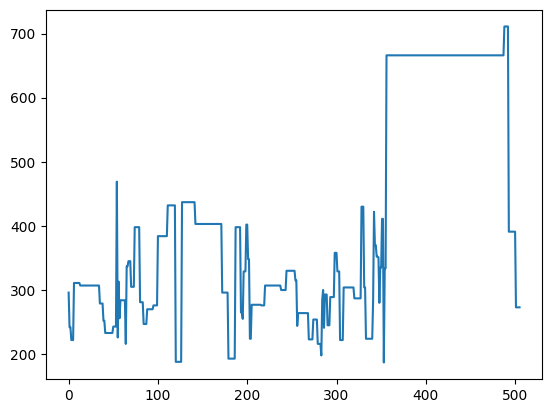

In [181]:
#1. biểu đồ line
df['tax'].plot()

<Axes: >

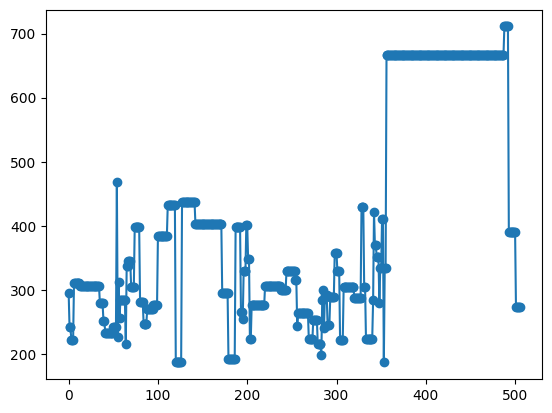

In [182]:
#2. Biểu đồ line kết hợp với point
df['tax'].plot(marker='o')

*từ vị trí này đến tới biểu đồ bên dưới cần liên kết các đoạn code mới xuất ra được biểu đồ.Trước tiên cứ biết như vậy đã, sau này tìm hiểu sau*

In [183]:
bins = [-999999, 250, 400, 999999]
labels = ['low', 'normal', 'high']
# low: -999999 <- 250
# normal: 250 <- 400
# high: 400 <- 999999
df['tax_labels'] = pd.cut(df['tax'], bins=bins, labels=labels)
df[df['tax_labels']=='high'].head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,tax_labels
54,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9,high
111,0.10084,0.0,10.01,0,0.547,6.715,81.6,2.6775,6,432,17.8,395.59,10.16,22.8,high
112,0.12329,0.0,10.01,0,0.547,5.913,92.9,2.3534,6,432,17.8,394.95,16.21,18.8,high
113,0.22212,0.0,10.01,0,0.547,6.092,95.4,2.5480,6,432,17.8,396.90,17.09,18.7,high
114,0.14231,0.0,10.01,0,0.547,6.254,84.2,2.2565,6,432,17.8,388.74,10.45,18.5,high


In [184]:
dict_tax = {
      'low':'thap',
      'normal':'tb',        
      'high':'cao'
    }
    
df['tax_labels'].map(dict_tax).head()

0      tb
1    thap
2    thap
3    thap
4    thap
Name: tax_labels, dtype: category
Categories (3, object): ['thap' < 'tb' < 'cao']

Biều đồ này được dùng phù hợp khi chúng ta muốn so sánh chênh lệch giữa các nhóm về mặt giá trị tuyệt đối.

C:\Users\admin\AppData\Local\Temp\ipykernel_47264\1223013597.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_summary = df[['tax_labels', 'tax']].groupby('tax_labels').sum()


<Axes: xlabel='tax_labels'>

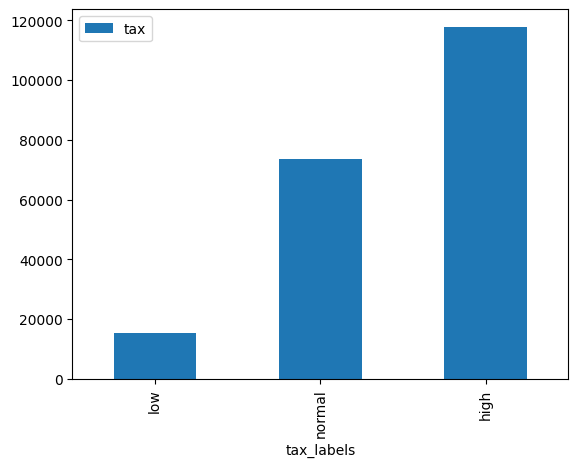

In [185]:
df_summary = df[['tax_labels', 'tax']].groupby('tax_labels').sum()
df_summary.plot.bar()

Ở đây ta sẽ phải dùng thêm hàm groupby để tạo thành bảng thống kê tổng thuế theo tax_labels rồi mới vẽ biểu đồ. Khi quen thuộc bạn có thể viết gọn hai câu lệnh lại thành một line như sau:

C:\Users\admin\AppData\Local\Temp\ipykernel_47264\2959853973.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['tax_labels', 'tax']].groupby('tax_labels').sum().plot.bar()


<Axes: xlabel='tax_labels'>

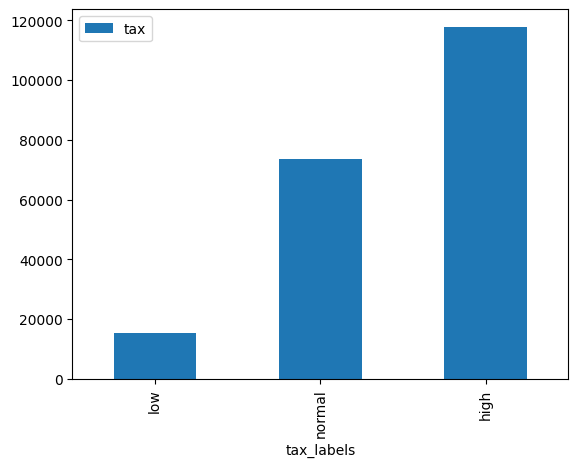

In [186]:
df[['tax_labels', 'tax']].groupby('tax_labels').sum().plot.bar()

4. Biểu đồ pie
Đây là biểu đồ dùng để thể hiện giá trị phần trăm. Phù hợp khi so sánh giá trị tương đối giữa các nhóm.

<Axes: ylabel='tax'>

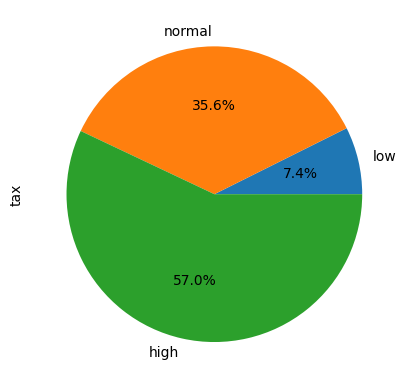

In [187]:
df_summary['tax'].plot.pie(autopct = '%1.1f%%')

5. Biểu đồ boxplot

Biểu đồ boxplot sẽ được sử dụng để quan sát phân phối của biến đối với các giá trị min, max và các ngưỡng phân vị 25%, 50%, 75%. Căn cứ vào boxplot ta có thể biết được khoảng biến thiên của biến rộng hay hẹp, biến phân phối lệch trái hay phải.

<Axes: >

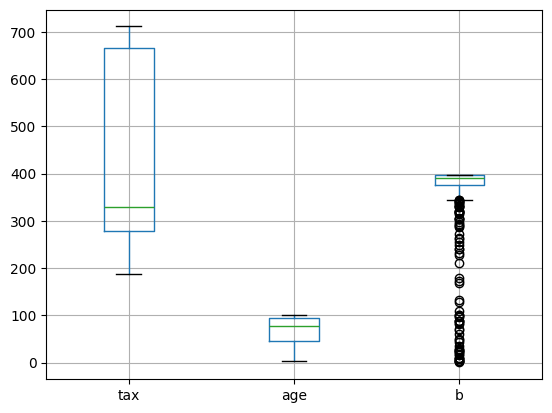

In [188]:
df[['tax', 'age', 'b']].boxplot()

6. Biểu đồ area

Biểu đồ area cho ta biết diện tích nằm dưới đường biểu diễn và trên trục hoành.

<Axes: xlabel='tax_labels'>

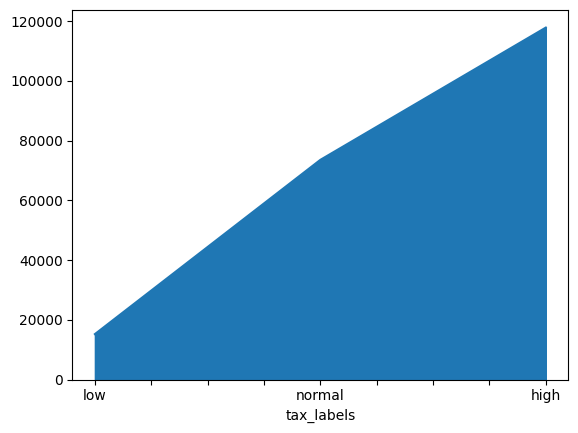

In [189]:
df_summary['tax'].plot.area()

2.3. Reshape dataframe trên pandas

2.3.1. Melt:
Biến nhiều cột giá trị ban đầu thành hai cột variable và value trong đó cột variable qui định loại measurement và value là giá trị của measurement

In [190]:
df5 = pd.DataFrame({
  'Ho':['Pham','Nguyen'],
  'Ten' :['Cong', 'Dong'],
  'ChieuCao':[170, 175],
  'CanNang':[60, 65],
  'Tuoi': [25, 27],
  'Diem': [8.5, 9.0],
})

df5

,Ho,Ten,ChieuCao,CanNang,Tuoi,Diem
0,Pham,Cong,170,60,25,8.5
1,Nguyen,Dong,175,65,27,9.0


Ta nhận thấy Ho, Ten là những dimension, bây giờ ta sẽ giữ nguyên những trường này và làm tan chảy các cột.

In [191]:
df5.melt(['Ho', 'Ten'])

,Ho,Ten,variable,value
0,Pham,Cong,ChieuCao,170.0
1,Nguyen,Dong,ChieuCao,175.0
2,Pham,Cong,CanNang,60.0
3,Nguyen,Dong,CanNang,65.0
4,Pham,Cong,Tuoi,25.0
5,Nguyen,Dong,Tuoi,27.0
6,Pham,Cong,Diem,8.5
7,Nguyen,Dong,Diem,9.0


2.3.2. Biến đổi Dummy
Biến đổi Dummy (Dummy Variable Transformation) là quá trình chuyển đổi các biến phân loại (categorical variables) thành các biến nhị phân (binary variables), thường có giá trị là 0 hoặc 1.

Mục đích:
1./ Giúp các mô hình học máy xử lý các biến phân loại: Các thuật toán như hồi quy tuyến tính, hồi quy logistic, hoặc các mô hình học máy khác yêu cầu biến đầu vào là số. Do đó, các biến phân loại phải được chuyển đổi thành dạng số để các thuật toán có thể sử dụng.
2./ Chuyển đổi các giá trị phân loại thành các biến độc lập: Mỗi giá trị khác nhau trong một biến phân loại sẽ được chuyển thành một cột riêng biệt (biến Dummy), và giá trị của cột đó là 0 hoặc 1.

In [192]:
pd.get_dummies(df5)

,ChieuCao,CanNang,Tuoi,Diem,Ho_Nguyen,Ho_Pham,Ten_Cong,Ten_Dong
0,170,60,25,8.5,False,True,True,False
1,175,65,27,9.0,True,False,False,True


2.4. Thống kê theo nhóm trên pandas


2.4.1. df.groupby(): Hàm groupby() trong Pandas là một công cụ mạnh mẽ cho phép bạn nhóm dữ liệu dựa trên một hoặc nhiều cột và sau đó áp dụng các thao tác như tính tổng, trung bình, đếm, v.v. trên từng nhóm đó.

Measurement (Đo lường): là các giá trị số lượng thể hiện 1 đại lượng cụ thể, thường là số liệu đẻ đánh giá hiệu suất hoặc kết quả.
Ví dụ: Các số liệu như doanh thu, số lượng sản phẩm bán ra, số lượt truy cập trang web, chi phí marketing, số lượt sử dụng dịch vụ, hoặc tổng số lượng vé xe buýt bán ra trong một khoảng thời gian

Dimensions là các đặc điểm hoặc thuộc tính phi số lượng giúp phân loại, mô tả, và phân tích dữ liệu. 
Ví dụ: Các thuộc tính như thời gian (ngày, tháng, năm), địa điểm (khu vực, thành phố), loại sản phẩm, danh mục khách hàng, phương tiện giao thông, hoặc tuyến đường của xe buýt.

In [193]:
data = {'Tuyến': ['A', 'B', 'A', 'B', 'A', 'C'],
        'Ngày': ['2023-09-01', '2023-09-01', '2023-09-02', '2023-09-02', '2023-09-01', '2023-09-01'],
        'Số lượng vé': [100, 150, 200, 180, 300, 120],
        'Doanh thu': [1000, 1500, 2000, 1800, 3000, 1200]}

df = pd.DataFrame(data)
df

,Tuyến,Ngày,Số lượng vé,Doanh thu
0,A,2023-09-01,100,1000
1,B,2023-09-01,150,1500
2,A,2023-09-02,200,2000
3,B,2023-09-02,180,1800
4,A,2023-09-01,300,3000
5,C,2023-09-01,120,1200


In [194]:
# Nhóm theo cột 'Tuyến' và tính tổng 'Số lượng vé' theo từng nhóm
df_grouped = df.groupby('Tuyến')['Số lượng vé'].sum()
df_grouped


Tuyến
A    600
B    330
C    120
Name: Số lượng vé, dtype: int64

In [195]:
# Nhóm theo cả 'Tuyến' và 'Ngày' và tính tổng 'Số lượng vé'
df_grouped = df.groupby(['Tuyến', 'Ngày'])['Số lượng vé'].sum()
df_grouped

Tuyến  Ngày      
A      2023-09-01    400
       2023-09-02    200
B      2023-09-01    150
       2023-09-02    180
C      2023-09-01    120
Name: Số lượng vé, dtype: int64

Một số hàm thường dùng kết hợp với groupby():
sum(): Tính tổng.
mean(): Tính trung bình.
count(): Đếm số lượng giá trị.
min(), max(): Tìm giá trị nhỏ nhất, lớn nhất.
agg(): Áp dụng nhiều hàm cùng lúc.

Áp dụng nhiều hàm cùng lúc với agg()

In [196]:
df_grouped = df.groupby('Tuyến')['Số lượng vé'].agg(['sum', 'mean', 'count','max'])
print(df_grouped)

       sum   mean  count  max
Tuyến                        
A      600  200.0      3  300
B      330  165.0      2  180
C      120  120.0      1  120


Áp dụng nhiều hàm cho nhiều cột

In [197]:
# Nhóm dữ liệu theo 'Tuyến' và tính toán cho nhiều cột
df_grouped = df.groupby('Tuyến').agg({
    'Số lượng vé': ['sum', 'mean'],    # Áp dụng 'sum' và 'mean' cho cột 'Số lượng vé'
    'Doanh thu': ['sum', 'max']        # Áp dụng 'sum' và 'max' cho cột 'Doanh thu'
})
print(df_grouped)

      Số lượng vé        Doanh thu      
              sum   mean       sum   max
Tuyến                                   
A             600  200.0      6000  3000
B             330  165.0      3300  1800
C             120  120.0      1200  1200


Sử dụng nhiều hàm cho nhiều cột và hiển thị tên cột rõ ràng

In [198]:
df_grouped = df.groupby('Tuyến').agg(
    Tổng_vé=('Số lượng vé', 'sum'),
    Trung_bình_vé=('Số lượng vé', 'mean'),
    Tổng_doanh_thu=('Doanh thu', 'sum'),
    Max_doanh_thu=('Doanh thu', 'max')
)

print(df_grouped)


       Tổng_vé  Trung_bình_vé  Tổng_doanh_thu  Max_doanh_thu
Tuyến                                                       
A          600          200.0            6000           3000
B          330          165.0            3300           1800
C          120          120.0            1200           1200


Sử dụng apply() với nhiều measurements

In [199]:
# Áp dụng hàm tùy chỉnh với apply() cho nhiều cột
df_grouped = df.groupby('Tuyến').apply(lambda x: pd.Series({
    'Tổng vé': x['Số lượng vé'].sum(),
    'Tổng doanh thu': x['Doanh thu'].sum(),
    'Trung bình vé': x['Số lượng vé'].mean(),
    'Max doanh thu': x['Doanh thu'].max()
}))
print(df_grouped)


       Tổng vé  Tổng doanh thu  Trung bình vé  Max doanh thu
Tuyến                                                       
A        600.0          6000.0          200.0         3000.0
B        330.0          3300.0          165.0         1800.0
C        120.0          1200.0          120.0         1200.0


C:\Users\admin\AppData\Local\Temp\ipykernel_47264\3339866401.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = df.groupby('Tuyến').apply(lambda x: pd.Series({


Tự định nghĩa hàm sử dụng cho lambda

In [207]:
# Hàm tùy chỉnh
def doanh_thu_tren_ve(group):
    total_doanh_thu = group['Doanh thu'].sum()  # Tính tổng doanh thu
    total_ve = group['Số lượng vé'].sum()       # Tính tổng số lượng vé
    return total_doanh_thu / total_ve            # Trả về doanh thu trên mỗi vé

# Nhóm theo cột 'Tuyến' và áp dụng hàm
df_grouped = df.groupby('Tuyến').apply(doanh_thu_tren_ve)
df_grouped


C:\Users\admin\AppData\Local\Temp\ipykernel_47264\3483908529.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = df.groupby('Tuyến').apply(doanh_thu_tren_ve)


Tuyến
A    10.0
B    10.0
C    10.0
dtype: float64

In [206]:
# Sử dụng apply() để tạo cột tùy chỉnh
df_grouped = df.groupby('Tuyến').apply(lambda x: pd.Series({
    'Tổng vé': x['Số lượng vé'].sum(),
    'Tổng doanh thu': x['Doanh thu'].sum(),
    'Doanh thu trên vé': doanh_thu_tren_ve(x)
}))
df_grouped

C:\Users\admin\AppData\Local\Temp\ipykernel_47264\4221369094.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = df.groupby('Tuyến').apply(lambda x: pd.Series({


,Tổng vé,Tổng doanh thu,Doanh thu trên vé
Tuyến,,,
A,600.0,6000.0,10.0
B,330.0,3300.0,10.0
C,120.0,1200.0,10.0


In [208]:
# Hàm tùy chỉnh để tính tỷ lệ vé lớn hơn 150 trong mỗi nhóm
def ty_le_ve_lon_hon_150(group):
    return (group['Số lượng vé'] > 150).sum() / len(group)

# Sử dụng apply() để áp dụng hàm tùy chỉnh
df_grouped = df.groupby('Tuyến').apply(ty_le_ve_lon_hon_150)
print(df_grouped)


Tuyến
A    0.66667
B    0.50000
C    0.00000
dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_47264\581248882.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = df.groupby('Tuyến').apply(ty_le_ve_lon_hon_150)


Nhóm theo nhiều cột

In [209]:
# Nhóm theo 'Tuyến' và 'Ngày'
grouped = df.groupby(['Tuyến', 'Ngày']).agg({
    'Số lượng vé': 'sum',
    'Doanh thu': 'sum'
})

print(grouped)


                  Số lượng vé  Doanh thu
Tuyến Ngày                              
A     2023-09-01          400       4000
      2023-09-02          200       2000
B     2023-09-01          150       1500
      2023-09-02          180       1800
C     2023-09-01          120       1200


Sử dụng hàm tùy chỉnh với nhiều cột

In [210]:
# Hàm tùy chỉnh để tính doanh thu trên mỗi vé
def doanh_thu_tren_ve(group):
    total_doanh_thu = group['Doanh thu'].sum()
    total_ve = group['Số lượng vé'].sum()
    return total_doanh_thu / total_ve if total_ve != 0 else 0  # Tránh chia cho 0

# Nhóm theo 'Tuyến' và 'Ngày' và áp dụng hàm
result = df.groupby(['Tuyến', 'Ngày']).apply(doanh_thu_tren_ve)

print(result)


Tuyến  Ngày      
A      2023-09-01    10.0
       2023-09-02    10.0
B      2023-09-01    10.0
       2023-09-02    10.0
C      2023-09-01    10.0
dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_47264\1376186507.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby(['Tuyến', 'Ngày']).apply(doanh_thu_tren_ve)
